<a href="https://colab.research.google.com/github/AlineSouzaSantos/Imers-o-Dados-Alura/blob/main/Imers%C3%A3o_Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aula 3

In [70]:
#!pip install mplfinance
import pandas as pd
import plotly.express as px
import locale
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from prophet import Prophet

In [2]:
df_principal = pd.read_excel("/content/drive/MyDrive/Curso Python/Tabela de ações.xlsx", sheet_name="Principal")
df_principal.head(10)

,Ativo,Data,Último (R$),Var. Dia (%),Var. Sem. (%),Var. Mês (%),Var. Ano (%),Var. 12M (%),Val. Mín,Val. Máx,Volume
0,USIM5,2024-01-26,9.50,5.20,11.76,2.26,2.26,15.97,9.18,9.56,"319,16 M"
1,CMIN3,2024-01-26,6.82,2.40,2.40,-12.11,-12.11,50.56,6.66,6.86,"32,65 M"
2,PETR3,2024-01-26,41.96,2.19,7.73,7.64,7.64,77.55,40.81,42.34,"436,69 M"
3,SUZB3,2024-01-26,52.91,2.04,2.14,-4.89,-4.89,18.85,51.89,53.17,"162,55 M"
4,CPFE3,2024-01-26,37.10,2.03,2.49,-3.66,-3.66,20.70,36.37,37.32,"73,42 M"
5,PRIO3,2024-01-26,45.69,1.98,2.42,-0.78,-0.78,8.08,44.25,45.69,"319,92 M"
6,PETR4,2024-01-26,39.96,1.73,6.47,7.30,7.30,95.01,38.91,40.09,"1,64 B"
7,VALE3,2024-01-26,69.50,1.66,2.06,-9.97,-9.97,-23.49,67.50,69.81,"1,89 B"
8,MULT3,2024-01-26,28.19,1.58,2.03,-0.81,-0.81,24.02,27.71,28.36,"104,16 M"
9,ITUB4,2024-01-26,32.81,1.48,-0.39,-3.36,-3.36,34.25,32.35,32.91,"473,2 M"


In [3]:
df_totalAcoes = pd.read_excel("/content/drive/MyDrive/Curso Python/Tabela de ações.xlsx", sheet_name="Total_de_acoes")
df_totalAcoes.head(10)

,Código,Qtde. Teórica
0,RRRP3,2.356656e+08
1,ALOS3,5.326166e+08
2,ALPA4,1.767340e+08
3,ABEV3,4.394246e+09
4,ARZZ3,6.230589e+07
5,ASAI3,1.349218e+09
6,AZUL4,3.275937e+08
7,B3SA3,5.602790e+09
8,BBSE3,6.717508e+08
9,BBDC3,1.500729e+09


In [4]:
df_ticker = pd.read_excel("/content/drive/MyDrive/Curso Python/Tabela de ações.xlsx", sheet_name="Ticker")
df_ticker.head(10)

,Ticker,Nome
0,MGLU3,Magazine Luiza
1,HAPV3,Hapvida
2,PETR4,Petrobras
3,B3SA3,B3
4,USIM5,Usiminas
5,CVCB3,CVC
6,CIEL3,Cielo
7,VALE3,Vale
8,GOLL4,GOL
9,BBDC4,Banco Bradesco


In [5]:
df_segmento = pd.read_excel("/content/drive/MyDrive/Curso Python/Tabela de ações.xlsx", sheet_name="Segmento")
df_segmento.head(10)

,Empresa,Segmento,Idade (anos)
0,Usiminas,Siderurgia,68
1,CSN Mineração,Mineração,74
2,Petrobras,Petróleo e Gás,72
3,Suzano,Papel e Celulose,94
4,CPFL Energia,Energia Elétrica,112
5,PetroRio,Petróleo e Gás,24
6,Vale,Mineração,72
7,Multiplan,Shopping Centers,44
8,Itaú Unibanco,Banco,43
9,Rede D'Or,Saúde,25


In [6]:
df_principal = df_principal[['Ativo', 'Data', 'Último (R$)', 'Var. Dia (%)']].copy()
df_principal

,Ativo,Data,Último (R$),Var. Dia (%)
0,USIM5,2024-01-26,9.50,5.20
1,CMIN3,2024-01-26,6.82,2.40
2,PETR3,2024-01-26,41.96,2.19
3,SUZB3,2024-01-26,52.91,2.04
4,CPFE3,2024-01-26,37.10,2.03
...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45
77,BHIA3,2024-01-26,8.70,-2.46
78,RENT3,2024-01-26,56.24,-3.63
79,CVCB3,2024-01-26,3.07,-4.36


In [7]:
df_principal = df_principal.rename(columns={'Último (R$)':'valor_final','Var. Dia (%)':'var_dia_pct'}).copy()
df_principal

,Ativo,Data,valor_final,var_dia_pct
0,USIM5,2024-01-26,9.50,5.20
1,CMIN3,2024-01-26,6.82,2.40
2,PETR3,2024-01-26,41.96,2.19
3,SUZB3,2024-01-26,52.91,2.04
4,CPFE3,2024-01-26,37.10,2.03
...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45
77,BHIA3,2024-01-26,8.70,-2.46
78,RENT3,2024-01-26,56.24,-3.63
79,CVCB3,2024-01-26,3.07,-4.36


In [8]:
df_principal['Var_pct'] = df_principal['var_dia_pct']/100
df_principal['Valor_inicial'] = df_principal['valor_final']/(df_principal['Var_pct']+1)
df_principal

,Ativo,Data,valor_final,var_dia_pct,Var_pct,Valor_inicial
0,USIM5,2024-01-26,9.50,5.20,0.0520,9.030418
1,CMIN3,2024-01-26,6.82,2.40,0.0240,6.660156
2,PETR3,2024-01-26,41.96,2.19,0.0219,41.060769
3,SUZB3,2024-01-26,52.91,2.04,0.0204,51.852215
4,CPFE3,2024-01-26,37.10,2.03,0.0203,36.361854
...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.0245,10.978985
77,BHIA3,2024-01-26,8.70,-2.46,-0.0246,8.919418
78,RENT3,2024-01-26,56.24,-3.63,-0.0363,58.358410
79,CVCB3,2024-01-26,3.07,-4.36,-0.0436,3.209954


In [9]:
#Procv do excel
df_principal = df_principal.merge(df_totalAcoes,left_on='Ativo',right_on='Código',how='left')
df_principal

,Ativo,Data,valor_final,var_dia_pct,Var_pct,Valor_inicial,Código,Qtde. Teórica
0,USIM5,2024-01-26,9.50,5.20,0.0520,9.030418,USIM5,5.151174e+08
1,CMIN3,2024-01-26,6.82,2.40,0.0240,6.660156,CMIN3,1.110559e+09
2,PETR3,2024-01-26,41.96,2.19,0.0219,41.060769,PETR3,2.379878e+09
3,SUZB3,2024-01-26,52.91,2.04,0.0204,51.852215,SUZB3,6.834528e+08
4,CPFE3,2024-01-26,37.10,2.03,0.0203,36.361854,CPFE3,1.877325e+08
...,...,...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.0245,10.978985,CRFB3,5.339906e+08
77,BHIA3,2024-01-26,8.70,-2.46,-0.0246,8.919418,BHIA3,9.484305e+07
78,RENT3,2024-01-26,56.24,-3.63,-0.0363,58.358410,RENT3,8.532023e+08
79,CVCB3,2024-01-26,3.07,-4.36,-0.0436,3.209954,CVCB3,5.255828e+08


In [10]:
df_principal = df_principal.drop(columns='Código')
df_principal

,Ativo,Data,valor_final,var_dia_pct,Var_pct,Valor_inicial,Qtde. Teórica
0,USIM5,2024-01-26,9.50,5.20,0.0520,9.030418,5.151174e+08
1,CMIN3,2024-01-26,6.82,2.40,0.0240,6.660156,1.110559e+09
2,PETR3,2024-01-26,41.96,2.19,0.0219,41.060769,2.379878e+09
3,SUZB3,2024-01-26,52.91,2.04,0.0204,51.852215,6.834528e+08
4,CPFE3,2024-01-26,37.10,2.03,0.0203,36.361854,1.877325e+08
...,...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.0245,10.978985,5.339906e+08
77,BHIA3,2024-01-26,8.70,-2.46,-0.0246,8.919418,9.484305e+07
78,RENT3,2024-01-26,56.24,-3.63,-0.0363,58.358410,8.532023e+08
79,CVCB3,2024-01-26,3.07,-4.36,-0.0436,3.209954,5.255828e+08


In [11]:
df_principal['variacao_reais'] = (df_principal['valor_final']-df_principal['Valor_inicial'])*df_principal['Qtde. Teórica']
df_principal

,Ativo,Data,valor_final,var_dia_pct,Var_pct,Valor_inicial,Qtde. Teórica,variacao_reais
0,USIM5,2024-01-26,9.50,5.20,0.0520,9.030418,5.151174e+08,2.418897e+08
1,CMIN3,2024-01-26,6.82,2.40,0.0240,6.660156,1.110559e+09,1.775160e+08
2,PETR3,2024-01-26,41.96,2.19,0.0219,41.060769,2.379878e+09,2.140059e+09
3,SUZB3,2024-01-26,52.91,2.04,0.0204,51.852215,6.834528e+08,7.229463e+08
4,CPFE3,2024-01-26,37.10,2.03,0.0203,36.361854,1.877325e+08,1.385740e+08
...,...,...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.0245,10.978985,5.339906e+08,-1.436355e+08
77,BHIA3,2024-01-26,8.70,-2.46,-0.0246,8.919418,9.484305e+07,-2.081024e+07
78,RENT3,2024-01-26,56.24,-3.63,-0.0363,58.358410,8.532023e+08,-1.807433e+09
79,CVCB3,2024-01-26,3.07,-4.36,-0.0436,3.209954,5.255828e+08,-7.355741e+07


In [12]:
pd.options.display.float_format = '{:.2f}'.format
df_principal

,Ativo,Data,valor_final,var_dia_pct,Var_pct,Valor_inicial,Qtde. Teórica,variacao_reais
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391.00,241889725.43
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345.00,177515970.30
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655.00,2140059393.53
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836.00,722946282.71
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36,187732538.00,138573955.06
...,...,...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.02,10.98,533990587.00,-143635530.57
77,BHIA3,2024-01-26,8.70,-2.46,-0.02,8.92,94843047.00,-20810240.84
78,RENT3,2024-01-26,56.24,-3.63,-0.04,58.36,853202347.00,-1807432634.46
79,CVCB3,2024-01-26,3.07,-4.36,-0.04,3.21,525582771.00,-73557408.06


In [13]:
df_principal['Qtde. Teórica'] = df_principal['Qtde. Teórica'].astype(int)
df_principal

,Ativo,Data,valor_final,var_dia_pct,Var_pct,Valor_inicial,Qtde. Teórica,variacao_reais
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391,241889725.43
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345,177515970.30
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836,722946282.71
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36,187732538,138573955.06
...,...,...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.02,10.98,533990587,-143635530.57
77,BHIA3,2024-01-26,8.70,-2.46,-0.02,8.92,94843047,-20810240.84
78,RENT3,2024-01-26,56.24,-3.63,-0.04,58.36,853202347,-1807432634.46
79,CVCB3,2024-01-26,3.07,-4.36,-0.04,3.21,525582771,-73557408.06


In [14]:
df_principal = df_principal.rename(columns={'Qtde. Teórica':'qtd_teorica'}).copy()
df_principal

,Ativo,Data,valor_final,var_dia_pct,Var_pct,Valor_inicial,qtd_teorica,variacao_reais
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391,241889725.43
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345,177515970.30
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836,722946282.71
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36,187732538,138573955.06
...,...,...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.02,10.98,533990587,-143635530.57
77,BHIA3,2024-01-26,8.70,-2.46,-0.02,8.92,94843047,-20810240.84
78,RENT3,2024-01-26,56.24,-3.63,-0.04,58.36,853202347,-1807432634.46
79,CVCB3,2024-01-26,3.07,-4.36,-0.04,3.21,525582771,-73557408.06


In [15]:
df_principal['resultado'] = df_principal['variacao_reais'].apply(lambda x: 'Subiu' if x>0 else ('Desceu' if x<0 else 'Estável'))
df_principal

,Ativo,Data,valor_final,var_dia_pct,Var_pct,Valor_inicial,qtd_teorica,variacao_reais,resultado
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391,241889725.43,Subiu
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345,177515970.30,Subiu
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53,Subiu
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836,722946282.71,Subiu
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36,187732538,138573955.06,Subiu
...,...,...,...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.02,10.98,533990587,-143635530.57,Desceu
77,BHIA3,2024-01-26,8.70,-2.46,-0.02,8.92,94843047,-20810240.84,Desceu
78,RENT3,2024-01-26,56.24,-3.63,-0.04,58.36,853202347,-1807432634.46,Desceu
79,CVCB3,2024-01-26,3.07,-4.36,-0.04,3.21,525582771,-73557408.06,Desceu


In [16]:
df_principal = df_principal.merge(df_ticker,left_on='Ativo',right_on='Ticker',how='left')
df_principal = df_principal.drop(columns= 'Ticker')
df_principal

,Ativo,Data,valor_final,var_dia_pct,Var_pct,Valor_inicial,qtd_teorica,variacao_reais,resultado,Nome
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391,241889725.43,Subiu,Usiminas
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345,177515970.30,Subiu,CSN Mineração
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53,Subiu,Petrobras
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836,722946282.71,Subiu,Suzano
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36,187732538,138573955.06,Subiu,CPFL Energia
...,...,...,...,...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.02,10.98,533990587,-143635530.57,Desceu,Carrefour Brasil
77,BHIA3,2024-01-26,8.70,-2.46,-0.02,8.92,94843047,-20810240.84,Desceu,Casas Bahia
78,RENT3,2024-01-26,56.24,-3.63,-0.04,58.36,853202347,-1807432634.46,Desceu,Localiza
79,CVCB3,2024-01-26,3.07,-4.36,-0.04,3.21,525582771,-73557408.06,Desceu,CVC


In [17]:
df_principal = df_principal.merge(df_segmento,left_on='Nome',right_on='Empresa',how='left')
df_principal = df_principal.drop(columns= 'Empresa')
df_principal

,Ativo,Data,valor_final,var_dia_pct,Var_pct,Valor_inicial,qtd_teorica,variacao_reais,resultado,Nome,Segmento,Idade (anos)
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391,241889725.43,Subiu,Usiminas,Siderurgia,68
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345,177515970.30,Subiu,CSN Mineração,Mineração,74
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53,Subiu,Petrobras,Petróleo e Gás,72
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836,722946282.71,Subiu,Suzano,Papel e Celulose,94
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36,187732538,138573955.06,Subiu,CPFL Energia,Energia Elétrica,112
...,...,...,...,...,...,...,...,...,...,...,...,...
78,CRFB3,2024-01-26,10.71,-2.45,-0.02,10.98,533990587,-143635530.57,Desceu,Carrefour Brasil,Varejo Alimentício,75
79,BHIA3,2024-01-26,8.70,-2.46,-0.02,8.92,94843047,-20810240.84,Desceu,Casas Bahia,Varejo de Eletrodomésticos,52
80,RENT3,2024-01-26,56.24,-3.63,-0.04,58.36,853202347,-1807432634.46,Desceu,Localiza,Aluguel de Carros,50
81,CVCB3,2024-01-26,3.07,-4.36,-0.04,3.21,525582771,-73557408.06,Desceu,CVC,Turismo,52


In [18]:
df_principal = df_principal.rename(columns={'Idade (anos)':'idade_anos'}).copy()
df_principal

,Ativo,Data,valor_final,var_dia_pct,Var_pct,Valor_inicial,qtd_teorica,variacao_reais,resultado,Nome,Segmento,idade_anos
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391,241889725.43,Subiu,Usiminas,Siderurgia,68
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345,177515970.30,Subiu,CSN Mineração,Mineração,74
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53,Subiu,Petrobras,Petróleo e Gás,72
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836,722946282.71,Subiu,Suzano,Papel e Celulose,94
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36,187732538,138573955.06,Subiu,CPFL Energia,Energia Elétrica,112
...,...,...,...,...,...,...,...,...,...,...,...,...
78,CRFB3,2024-01-26,10.71,-2.45,-0.02,10.98,533990587,-143635530.57,Desceu,Carrefour Brasil,Varejo Alimentício,75
79,BHIA3,2024-01-26,8.70,-2.46,-0.02,8.92,94843047,-20810240.84,Desceu,Casas Bahia,Varejo de Eletrodomésticos,52
80,RENT3,2024-01-26,56.24,-3.63,-0.04,58.36,853202347,-1807432634.46,Desceu,Localiza,Aluguel de Carros,50
81,CVCB3,2024-01-26,3.07,-4.36,-0.04,3.21,525582771,-73557408.06,Desceu,CVC,Turismo,52


In [19]:
df_principal['cat_idade'] = df_principal['idade_anos'].apply(lambda x: 'Mais de 100 anos' if x>100 else ('Menos de 50 anos' if x<50 else 'Entre 50 e 100 anos'))
df_principal

,Ativo,Data,valor_final,var_dia_pct,Var_pct,Valor_inicial,qtd_teorica,variacao_reais,resultado,Nome,Segmento,idade_anos,cat_idade
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391,241889725.43,Subiu,Usiminas,Siderurgia,68,Entre 50 e 100 anos
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345,177515970.30,Subiu,CSN Mineração,Mineração,74,Entre 50 e 100 anos
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53,Subiu,Petrobras,Petróleo e Gás,72,Entre 50 e 100 anos
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836,722946282.71,Subiu,Suzano,Papel e Celulose,94,Entre 50 e 100 anos
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36,187732538,138573955.06,Subiu,CPFL Energia,Energia Elétrica,112,Mais de 100 anos
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,CRFB3,2024-01-26,10.71,-2.45,-0.02,10.98,533990587,-143635530.57,Desceu,Carrefour Brasil,Varejo Alimentício,75,Entre 50 e 100 anos
79,BHIA3,2024-01-26,8.70,-2.46,-0.02,8.92,94843047,-20810240.84,Desceu,Casas Bahia,Varejo de Eletrodomésticos,52,Entre 50 e 100 anos
80,RENT3,2024-01-26,56.24,-3.63,-0.04,58.36,853202347,-1807432634.46,Desceu,Localiza,Aluguel de Carros,50,Entre 50 e 100 anos
81,CVCB3,2024-01-26,3.07,-4.36,-0.04,3.21,525582771,-73557408.06,Desceu,CVC,Turismo,52,Entre 50 e 100 anos


In [20]:
#Análises
maior = df_principal['variacao_reais'].max()
menor = df_principal['variacao_reais'].min()
media = df_principal['variacao_reais'].mean()
media_subiu = df_principal[df_principal['resultado'] == 'Subiu']['variacao_reais'].mean()
media_desceu = df_principal[df_principal['resultado'] == 'Desceu']['variacao_reais'].mean()
print(f"Maior variação\tR$ {maior:.2f}")
print(f"Menor variação\tR$ {menor:.2f}")
print(f"Média variação\tR$ {media:.2f}")
print(f"Média de quem subiu\tR$ {media_subiu:.2f}")
print(f"Média de quem desceu\tR$ {media_desceu:.2f}")

Maior variação	R$ 4762926995.25
Menor variação	R$ -1807432634.46
Média variação	R$ 154547114.74
Média de quem subiu	R$ 448164250.23
Média de quem desceu	R$ -186265310.46


In [21]:
df_principal_subiu = df_principal[df_principal['resultado'] == 'Subiu']
df_principal_subiu

,Ativo,Data,valor_final,var_dia_pct,Var_pct,Valor_inicial,qtd_teorica,variacao_reais,resultado,Nome,Segmento,idade_anos,cat_idade
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391,241889725.43,Subiu,Usiminas,Siderurgia,68,Entre 50 e 100 anos
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345,177515970.30,Subiu,CSN Mineração,Mineração,74,Entre 50 e 100 anos
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53,Subiu,Petrobras,Petróleo e Gás,72,Entre 50 e 100 anos
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836,722946282.71,Subiu,Suzano,Papel e Celulose,94,Entre 50 e 100 anos
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36,187732538,138573955.06,Subiu,CPFL Energia,Energia Elétrica,112,Mais de 100 anos
5,PRIO3,2024-01-26,45.69,1.98,0.02,44.80,800010734,709687498.18,Subiu,PetroRio,Petróleo e Gás,24,Menos de 50 anos
6,PETR4,2024-01-26,39.96,1.73,0.02,39.28,4566445852,3103136291.22,Subiu,Petrobras,Petróleo e Gás,72,Entre 50 e 100 anos
7,VALE3,2024-01-26,69.50,1.66,0.02,68.37,4196924316,4762926995.25,Subiu,Vale,Mineração,72,Entre 50 e 100 anos
8,MULT3,2024-01-26,28.19,1.58,0.02,27.75,268505432,117732680.08,Subiu,Multiplan,Shopping Centers,44,Menos de 50 anos
9,ITUB4,2024-01-26,32.81,1.48,0.01,32.33,4801593832,2297591984.33,Subiu,Itaú Unibanco,Banco,43,Menos de 50 anos


In [22]:
df_analise_segmento = df_principal_subiu.groupby('Segmento')['variacao_reais'].sum().reset_index()
df_analise_segmento

,Segmento,variacao_reais
0,Alimentação,407833683.09
1,Aviação,65452205.55
2,Banco,3740512018.78
3,Combustíveis,11571106.42
4,Conglomerado,127229653.18
5,Construção Civil,37525872.38
6,Distribuidora de Combustíveis,388705223.96
7,Distribuidora de Materiais de Construção,18068446.61
8,Educação,72295838.99
9,Energia Elétrica,682315640.01


In [23]:
df_analise_saldo = df_principal.groupby('resultado')['variacao_reais'].sum().reset_index()
df_analise_saldo

,resultado,variacao_reais
0,Desceu,-6891816486.99
1,Estável,0.00
2,Subiu,19719227010.14


In [24]:
#criando gráficos
fig = px.bar(df_analise_saldo,x='resultado',y='variacao_reais', text='variacao_reais',title='Variação reais por resultado')
fig.update_traces(texttemplate="R$%{y:.3s}",)
#Sufixo G é um padrão para milhares
fig.show()

In [25]:
fig = px.pie(df_analise_segmento, names='Segmento',values='variacao_reais',title='Variação reais por segmento')
fig.show()

In [26]:
#Group By categoria de idade
df_analise_idade = df_principal.groupby('cat_idade')['variacao_reais'].sum().reset_index()
#Criando gráfico
fig = px.bar(df_analise_idade,x='cat_idade',y='variacao_reais', text='variacao_reais',title='Variação reais por idade da empresa')
fig.update_traces(texttemplate="R$%{y:.3s}",)
fig.show()

## Aula 4

In [31]:
#YF = API com dados da bolsa
#Ações BR te, que ter SA
dados = yf.download('PETR4.SA',start='2023-01-01',end='2023-12-31')
dados

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,23.54,23.81,22.80,22.92,17.71,78424700
2023-01-03,22.94,23.10,22.13,22.34,17.26,96750300
2023-01-04,21.96,23.59,21.83,23.05,17.81,129504000
2023-01-05,23.34,24.04,23.15,23.88,18.45,73886000
2023-01-06,23.94,24.32,23.55,23.74,18.34,51851500
...,...,...,...,...,...,...
2023-12-21,36.67,36.68,36.07,36.39,36.39,30511900
2023-12-22,36.50,36.80,36.37,36.74,36.74,31234700
2023-12-26,36.86,37.37,36.83,37.33,37.33,23466800


In [34]:
#Renomeando colunas
dados.columns = ['Abertura','Maximo','Minimo','Fechamento','Fech_Ajust','Volume']

In [37]:
dados = dados.rename_axis('Data')
dados

,Abertura,Maximo,Minimo,Fechamento,Fech_Ajust,Volume
Data,,,,,,
2023-01-02,23.54,23.81,22.80,22.92,17.71,78424700
2023-01-03,22.94,23.10,22.13,22.34,17.26,96750300
2023-01-04,21.96,23.59,21.83,23.05,17.81,129504000
2023-01-05,23.34,24.04,23.15,23.88,18.45,73886000
2023-01-06,23.94,24.32,23.55,23.74,18.34,51851500
...,...,...,...,...,...,...
2023-12-21,36.67,36.68,36.07,36.39,36.39,30511900
2023-12-22,36.50,36.80,36.37,36.74,36.74,31234700
2023-12-26,36.86,37.37,36.83,37.33,37.33,23466800


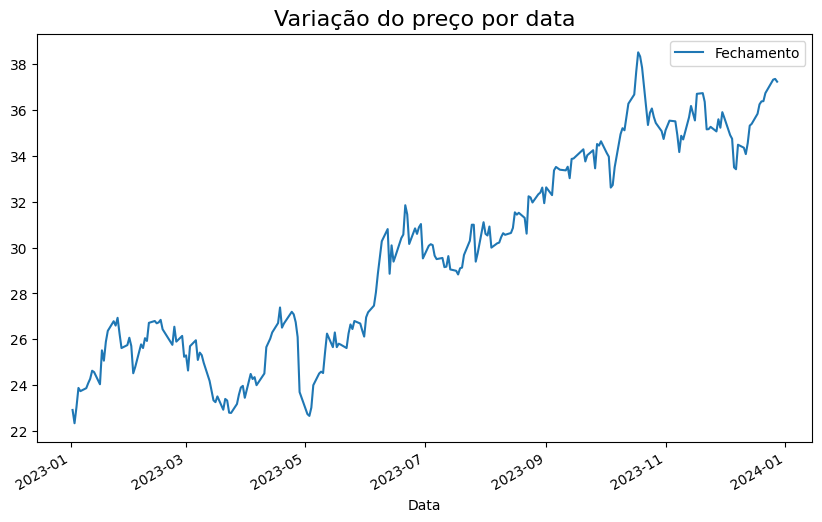

In [45]:
dados['Fechamento'].plot(figsize=(10,6))
plt.title('Variação do preço por data',fontsize=16)
plt.legend(['Fechamento'])

In [46]:
#Grafico de velas
df = dados.head(60).copy()
df['Data'] = df.index
df['Data'] = df['Data'].apply(mdates.date2num)

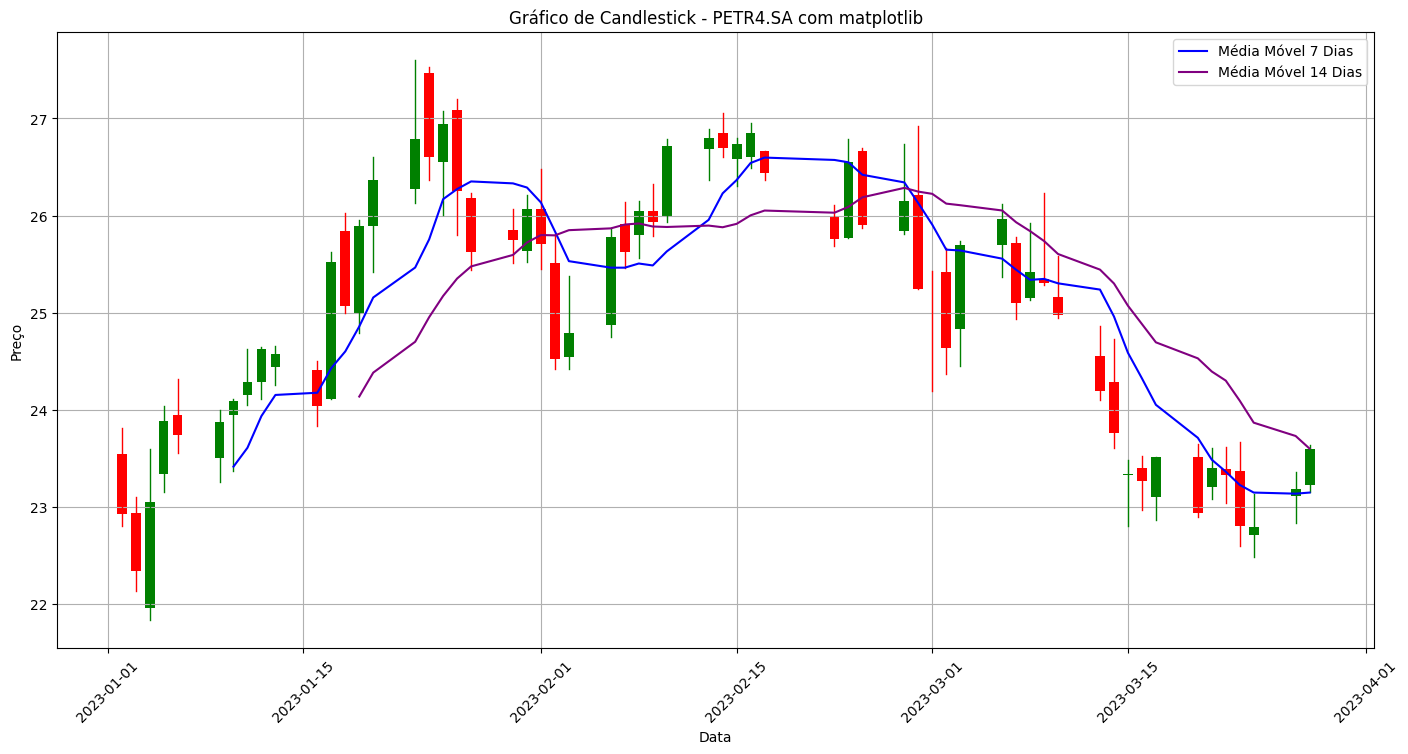

In [55]:
fig, ax = plt.subplots(figsize=(17,8))
width = 0.7
for i in range(len(df)):
  if df['Fechamento'].iloc[i] > df['Abertura'].iloc[i]:
    color = 'green'
  else:
    color = 'red'

  ax.plot([df['Data'].iloc[i], df['Data'].iloc[i]],
          [df['Minimo'].iloc[i], df['Maximo'].iloc[i]],
          color = color,
          linewidth=1)

  ax.add_patch(plt.Rectangle((df['Data'].iloc[i] - width/2, min(df['Abertura'].iloc[i], df['Fechamento'].iloc[i])),
                             width,
                             abs(df['Fechamento'].iloc[i] - df['Abertura'].iloc[i]),
                             facecolor=color))

df['MA7'] = df['Fechamento'].rolling(window=7).mean()
df['MA14'] = df['Fechamento'].rolling(window=14).mean()

ax.plot(df['Data'],df['MA7'], color = 'blue', label = 'Média Móvel 7 Dias')
ax.plot(df['Data'],df['MA14'], color = 'purple', label = 'Média Móvel 14 Dias')

ax.legend()

ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

plt.title("Gráfico de Candlestick - PETR4.SA com matplotlib")
plt.xlabel("Data")
plt.ylabel("Preço")

plt.grid(True)

plt.show()


In [56]:
#Utilizando Plotly para fazer o gráfico acima em 1 linha
# Criando subplots
'''
"Primeiro, criamos uma figura que conterá nossos gráficos usando make_subplots.
Isso nos permite ter múltiplos gráficos em uma única visualização.
Aqui, teremos dois subplots: um para o gráfico de candlestick e outro para o volume de transações."

'''
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    vertical_spacing=0.1,
                    subplot_titles=('Candlesticks', 'Volume Transacionado'),
                    row_width=[0.2, 0.7])

'''
"No gráfico de candlestick, cada candle representa um dia de negociação,
mostrando o preço de abertura, fechamento, máximo e mínimo. Vamos adicionar este gráfico à nossa figura."
'''
# Adicionando o gráfico de candlestick
fig.add_trace(go.Candlestick(x=df.index,
                             open=df['Abertura'],
                             high=df['Maximo'],
                             low=df['Minimo'],
                             close=df['Fechamento'],
                             name='Candlestick'),
                             row=1, col=1)

# Adicionando as médias móveis
# Adicionamos também médias móveis ao mesmo subplot para análise de tendências
fig.add_trace(go.Scatter(x=df.index,
                         y=df['MA7'],
                         mode='lines',
                         name='MA7 - Média Móvel 7 Dias'),
                         row=1, col=1)

fig.add_trace(go.Scatter(x=df.index,
                         y=df['MA14'],
                         mode='lines',
                         name='MA14 - Média Móvel 14 Dias'),
                         row=1, col=1)

# Adicionando o gráfico de barras para o volume
# Em seguida, criamos um gráfico de barras para o volume de transações, que nos dá uma ideia da atividade de negociação naquele dia
fig.add_trace(go.Bar(x=df.index,
                     y=df['Volume'],
                     name='Volume'),
                     row=2, col=1)

# Atualizando layout
#Finalmente, configuramos o layout da figura, ajustando títulos, formatos de eixo e outras configurações para tornar o gráfico claro e legível.
fig.update_layout(yaxis_title='Preço',
                  xaxis_rangeslider_visible=False,  # Desativa o range slider
                  width=1100, height=600)

# Mostrando o gráfico
fig.show()

[*********************100%%**********************]  1 of 1 completed


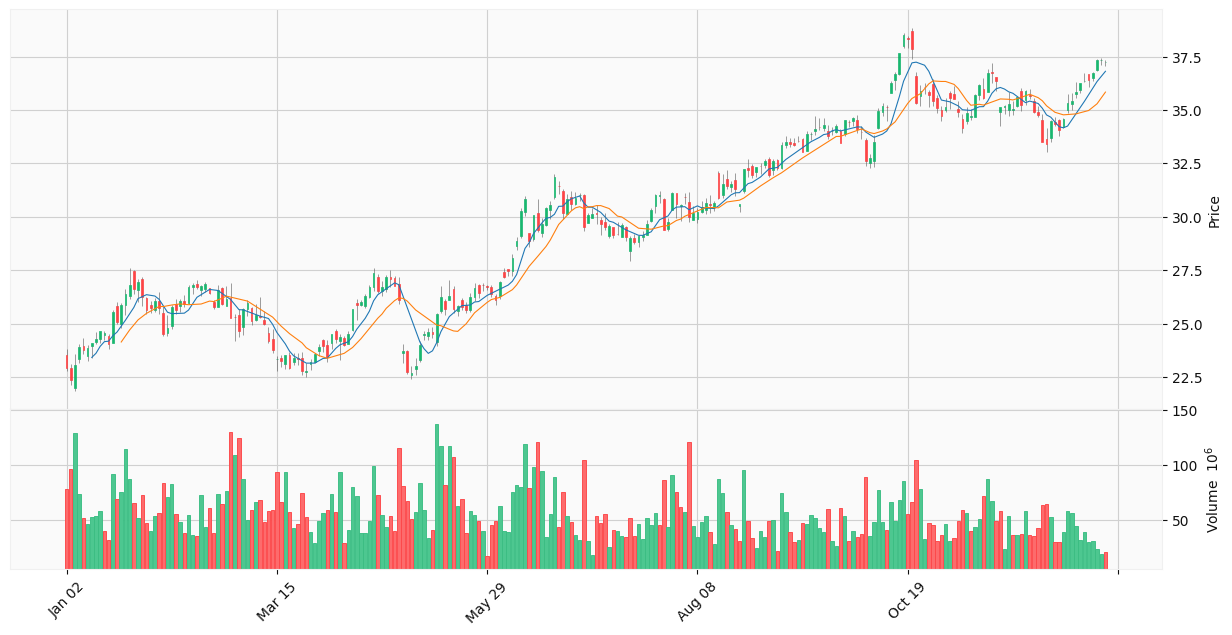

In [60]:
#Criando mesmo gráfico com API
dados = yf.download('PETR4.SA',start='2023-01-01',end='2023-12-31')
mpf.plot(dados.head(30), type ='candle', figsize = (16,8), volume = True, mav=(7,14), style='yahoo')

[*********************100%%**********************]  1 of 1 completed


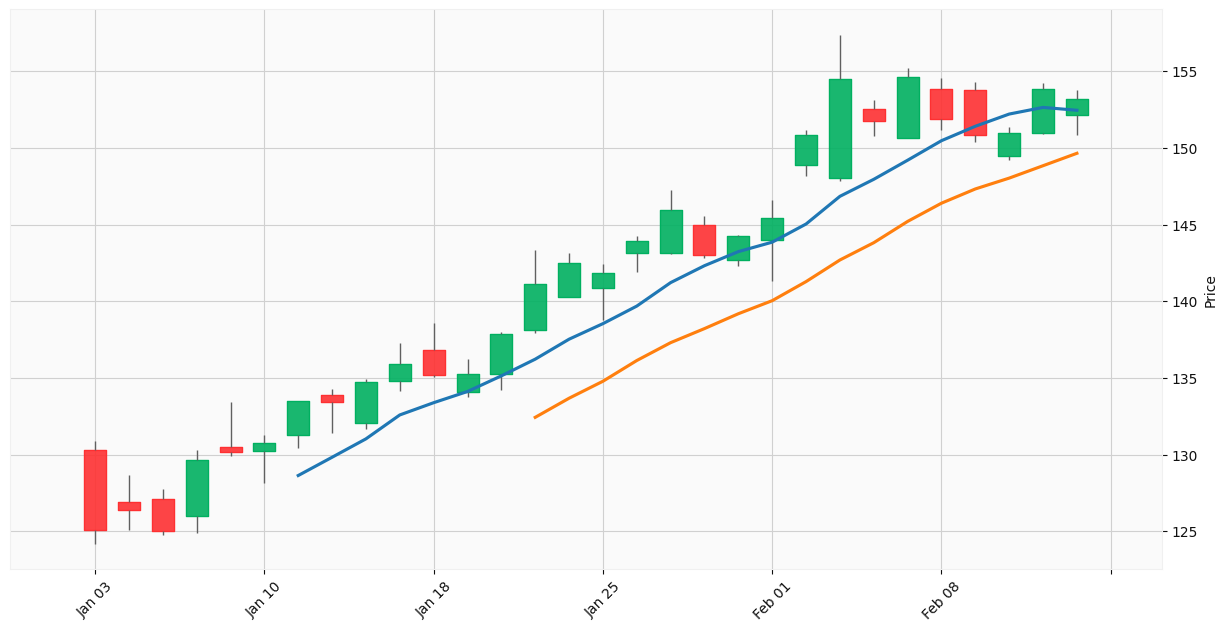

In [69]:
#Lição de casa: Fazer o gráfico com açõe da Apple
dados = yf.download('AAPL',start='2023-01-01',end='2023-12-31')
mpf.plot(dados.head(30), type ='candle', figsize = (16,8), volume = False, mav=(7,14), style='yahoo')

## Aula 5

In [80]:
dados = yf.download('JNJ',start='2020-01-01',end='2023-12-31', progress=False)
dados = dados.reset_index()
dados

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,145.87,146.02,145.08,145.97,130.10,5777000
1,2020-01-03,143.50,145.37,143.00,144.28,128.59,5752400
2,2020-01-06,144.00,144.20,142.85,144.10,128.43,7731300
3,2020-01-07,144.01,145.45,141.38,144.98,129.22,7382900
4,2020-01-08,144.87,145.98,143.70,144.96,129.20,6605800
...,...,...,...,...,...,...,...
1001,2023-12-22,155.25,156.53,155.02,155.46,154.29,3798500
1002,2023-12-26,155.00,156.35,154.85,156.14,154.96,4170000
1003,2023-12-27,155.50,156.52,155.42,156.35,155.17,5288100
1004,2023-12-28,156.00,157.24,155.99,156.58,155.40,4377500


In [73]:
#Separando os dados em treino e teste (Machine Learning)
dados_treino = dados[dados['Date'] < '2023-07-31']
dados_teste = dados[dados['Date'] >= '2023-07-31']

In [74]:
#Preparação para FBProphet
dados_prophet_treino = dados_treino[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

In [79]:
# Criar e treinar o modelo
modelo = Prophet(weekly_seasonality=True,
        yearly_seasonality=True,
        daily_seasonality=False)

modelo.add_country_holidays(country_name='US')

modelo.fit(dados_prophet_treino)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp9j5rckth/jbkdjlx0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9j5rckth/rhkj7ewz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85360', 'data', 'file=/tmp/tmp9j5rckth/jbkdjlx0.json', 'init=/tmp/tmp9j5rckth/rhkj7ewz.json', 'output', 'file=/tmp/tmp9j5rckth/prophet_model7y6j5r7t/prophet_model-20240330020052.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:00:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:00:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [76]:
# Criar datas futuras para previsão até o final de 2023
futuro = modelo.make_future_dataframe(periods=150)
previsao = modelo.predict(futuro)

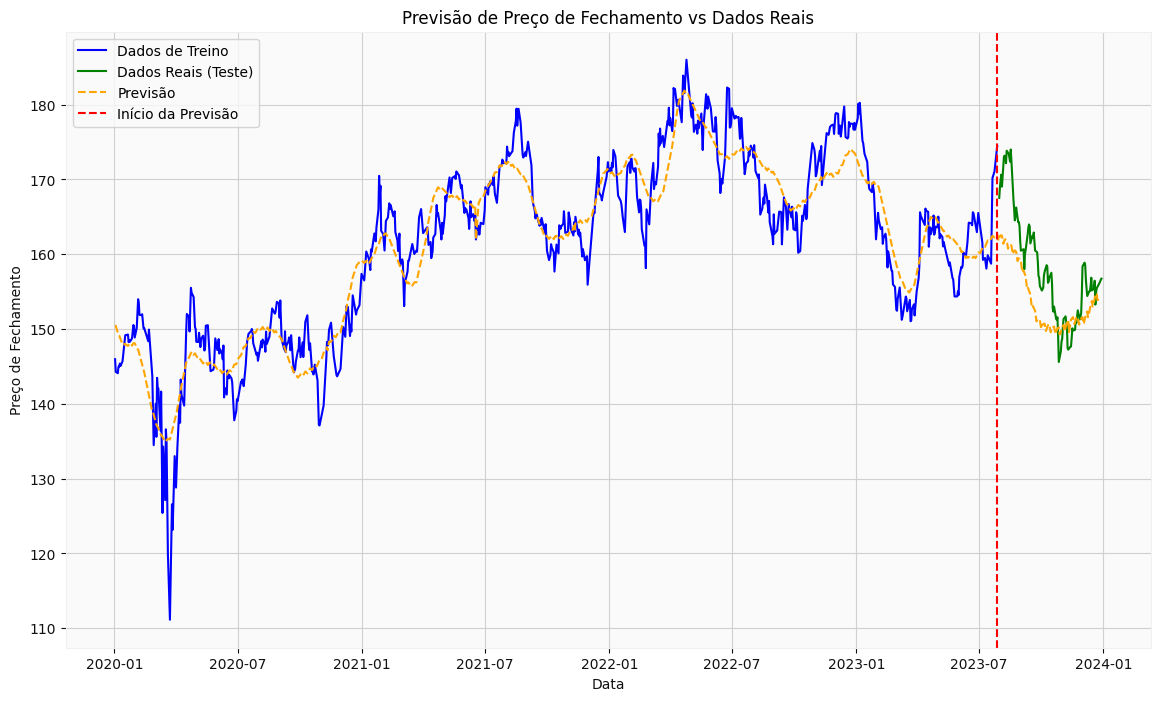

In [77]:
# Plotar os dados de treino, teste e previsões
plt.figure(figsize=(14, 8))
plt.plot(dados_treino['Date'], dados_treino['Close'], label='Dados de Treino', color='blue')
plt.plot(dados_teste['Date'], dados_teste['Close'], label='Dados Reais (Teste)', color='green')
plt.plot(previsao['ds'], previsao['yhat'], label='Previsão', color='orange', linestyle='--')

plt.axvline(dados_treino['Date'].max(), color='red', linestyle='--', label='Início da Previsão')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title('Previsão de Preço de Fechamento vs Dados Reais')
plt.legend()
plt.show()

DEBUG:cmdstanpy:input tempfile: /tmp/tmp9j5rckth/va739fx0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9j5rckth/h7t30ulw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71435', 'data', 'file=/tmp/tmp9j5rckth/va739fx0.json', 'init=/tmp/tmp9j5rckth/h7t30ulw.json', 'output', 'file=/tmp/tmp9j5rckth/prophet_modelss3437o6/prophet_model-20240330020335.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:03:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:03:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


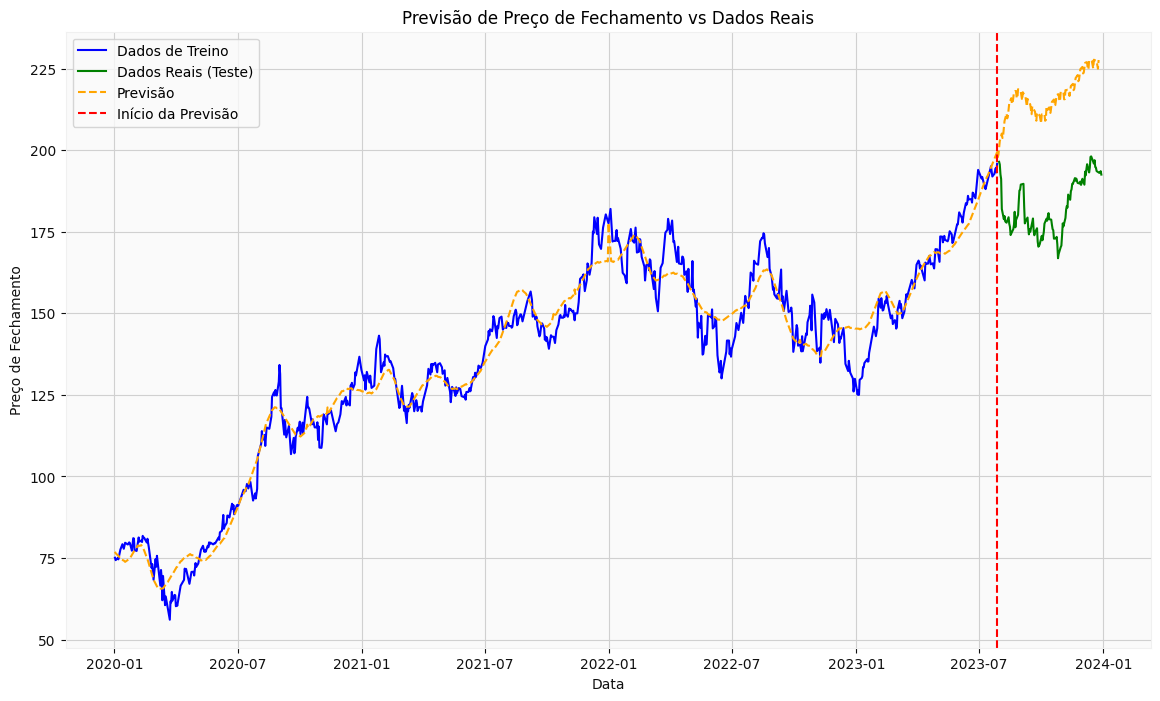

In [82]:
dados = yf.download('AAPL',start='2020-01-01',end='2023-12-31', progress=False)
dados = dados.reset_index()

dados_treino = dados[dados['Date'] < '2023-07-31']
dados_teste = dados[dados['Date'] >= '2023-07-31']

dados_prophet_treino = dados_treino[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

modelo = Prophet(weekly_seasonality=True,
        yearly_seasonality=True,
        daily_seasonality=False)

modelo.add_country_holidays(country_name='US')

modelo.fit(dados_prophet_treino)

futuro = modelo.make_future_dataframe(periods=150)
previsao = modelo.predict(futuro)

plt.figure(figsize=(14, 8))
plt.plot(dados_treino['Date'], dados_treino['Close'], label='Dados de Treino', color='blue')
plt.plot(dados_teste['Date'], dados_teste['Close'], label='Dados Reais (Teste)', color='green')
plt.plot(previsao['ds'], previsao['yhat'], label='Previsão', color='orange', linestyle='--')

plt.axvline(dados_treino['Date'].max(), color='red', linestyle='--', label='Início da Previsão')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title('Previsão de Preço de Fechamento vs Dados Reais')
plt.legend()
plt.show()